# MOwNiT
## Laboratorium 1
### Analiza danych - DataFrames

- Zaawansowany pakiet do działania na tabelkach nxm danych 
- Podobne do pandas DataFrames w Pythonie albo data.frame w R
- Specjalistyczne funkcje do statystyki
- W przypadku włąsnej instalacji należy zaistalować pakiet:

```julia
Pkg.add("DataFrames" )
```

- DataFrame to rodzaj bazy danych in-memory
- Składa się z kolumn, do których odwołujemy się używając symboli
- Każda z kolumn może przechowywać inny typ (inaczej niż w dwuwymiarowych tablicach )
- każda z kolumn jest typu Array{T,1} gdzie T jest okreslonym typem danych (np. Float64)
- strona pakietu: https://github.com/JuliaStats/DataFrames.jl
- dokumentacja najnowszej wersji: https://juliadata.github.io/DataFrames.jl/stable/index.html





In [1]:
# za pierwszym razem, jeśli uruchamiamy lokalnie to instalujemy
#using Pkg
#Pkg.add("DataFrames")

In [2]:
# Tworzenie DataFrame
using DataFrames
df1=DataFrame()
df1.MojaKolumna= 1:4
df1.x2= [4,pi,sqrt(2), 42]
df1.Col3= [true,false, true, false]
show(df1)

4×3 DataFrame
 Row │ MojaKolumna  x2        Col3  
     │ Int64        Float64   Bool  
─────┼──────────────────────────────
   1 │           1   4.0       true
   2 │           2   3.14159  false
   3 │           3   1.41421   true
   4 │           4  42.0      false

In [3]:
# ! - nie tworzy kopii, : - tworzy kopię
typeof(df1[!,2])

Vector{Float64} (alias for Array{Float64, 1})

In [4]:
typeof(df1[:,2])

Vector{Float64} (alias for Array{Float64, 1})

In [5]:
typeof(df1.Col3)

Vector{Bool} (alias for Array{Bool, 1})

In [6]:
# możemy też utworzyć DataFrame używając konstruktora
df2=DataFrame(MojaKolumna=1:10,
    Col2=[2,pi, sqrt(2), 3, 4,2,pi, sqrt(2), 3, 4],
    Col3=[true,true,false,true,false,true,true,false,true,false])

Row,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,1,2.0,true
2,2,3.14159,true
3,3,1.41421,false
4,4,3.0,true
5,5,4.0,false
6,6,2.0,true
7,7,3.14159,true
8,8,1.41421,false
9,9,3.0,true


In [7]:
# ilosc wierszy
size(df2, 1)

10

In [8]:
#ilosc kolumn
size(df2, 2)

3

In [9]:
# można odwoływać się po indeksie
show(df2[:,2])

[2.0, 3.141592653589793, 1.4142135623730951, 3.0, 4.0, 2.0, 3.141592653589793, 1.4142135623730951, 3.0, 4.0]

In [10]:
# albo po symbolu kolumny
show(df2[!,:Col2])

[2.0, 3.141592653589793, 1.4142135623730951, 3.0, 4.0, 2.0, 3.141592653589793, 1.4142135623730951, 3.0, 4.0]

In [11]:
# wiersze lub podzbiory wierszy i kolumn uzyskujemy poprzez operator (:). Wynikiem jest nowy DataFrame
show(df2[3,:])

DataFrameRow
 Row │ MojaKolumna  Col2     Col3  
     │ Int64        Float64  Bool  
─────┼─────────────────────────────
   3 │           3  1.41421  false

In [12]:
# drugi i trzeci wiersz
df2[2:3, :]

Row,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,2,3.14159,true
2,3,1.41421,false


In [13]:
# druga kolumna drugiego i trzeciego wiersza
df2[2:3, :Col2]

2-element Vector{Float64}:
 3.141592653589793
 1.4142135623730951

In [14]:
# druga i trzecia kolumna drugiego i trzeciego wiersza
df2[2:3,[:Col2, :Col3]]

Row,Col2,Col3
,Float64,Bool
1,3.14159,true
2,1.41421,false


In [15]:
# pierwsze sześć wierszy
DataFrames.first(df2,6)

Row,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,1,2.0,true
2,2,3.14159,true
3,3,1.41421,false
4,4,3.0,true
5,5,4.0,false
6,6,2.0,true


In [16]:
# ostatnie sześć wierszy
DataFrames.last(df2,6)

Row,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,5,4.0,false
2,6,2.0,true
3,7,3.14159,true
4,8,1.41421,false
5,9,3.0,true
6,10,4.0,false


In [17]:
# nazwy kolumn
names(df2)

3-element Vector{String}:
 "MojaKolumna"
 "Col2"
 "Col3"

In [18]:
# typy kolumn
eltype.(eachcol(df2))

3-element Vector{DataType}:
 Int64
 Float64
 Bool

In [19]:
# podstawowe dane statystyczne o wartościach w kolumnie
describe(df2)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,MojaKolumna,5.5,1,5.5,10,0,Int64
2,Col2,2.71116,1.41421,3.0,4.0,0,Float64
3,Col3,0.6,false,1.0,true,0,Bool


In [20]:
using Statistics
mean(df2.Col2)

2.711161243192578

In [21]:
var(df2.Col2)

0.9150284373648316

In [22]:
#using Pkg
#Pkg.add("CSV")
using CSV
input="winequality.csv"
mydata=CSV.read(input, delim=";",DataFrame)

Row,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
5,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.0,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
7,7.9,0.6,0.06,1.6,0.069,15.0,59.0,0.9964,3.3,0.46,9.4,5
8,7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
9,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7


In [23]:
describe(mydata)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,fixed acidity,8.31964,4.6,7.9,15.9,0,Float64
2,volatile acidity,0.527821,0.12,0.52,1.58,0,Float64
3,citric acid,0.270976,0.0,0.26,1.0,0,Float64
4,residual sugar,2.53881,0.9,2.2,15.5,0,Float64
5,chlorides,0.0874665,0.012,0.079,0.611,0,Float64
6,free sulfur dioxide,15.8749,1.0,14.0,72.0,0,Float64
7,total sulfur dioxide,46.4678,6.0,38.0,289.0,0,Float64
8,density,0.996747,0.99007,0.99675,1.00369,0,Float64
9,pH,3.31111,2.74,3.31,4.01,0,Float64


In [24]:
typeof(mydata)

DataFrame

In [25]:
size(mydata)

(1599, 12)

In [26]:
# Dzielenie DataFrame na podgrupy i działania na nich

# Split -Apply - Combine

#https://dataframes.juliadata.org/stable/man/split_apply_combine/

# rozdzielanie na podgrupy po jakości wina (quality)
# Split

wine_grouped=groupby(mydata, :quality)

Row,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,11.6,0.58,0.66,2.2,0.074,10.0,47.0,1.0008,3.25,0.57,9.0,3
2,10.4,0.61,0.49,2.1,0.2,5.0,16.0,0.9994,3.16,0.63,8.4,3
3,7.4,1.185,0.0,4.25,0.097,5.0,14.0,0.9966,3.63,0.54,10.7,3
4,10.4,0.44,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
5,8.3,1.02,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3
6,7.6,1.58,0.0,2.1,0.137,5.0,9.0,0.99476,3.5,0.4,10.9,3
7,6.8,0.815,0.0,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3
8,7.3,0.98,0.05,2.1,0.061,20.0,49.0,0.99705,3.31,0.55,9.7,3
9,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.4,0.52,10.2,3


In [27]:

# podsumowanie ile jest win w każdej grupie
combine(wine_grouped, nrow)

Row,quality,nrow
,Int64,Int64
1,3,10
2,4,53
3,5,681
4,6,638
5,7,199
6,8,18


In [28]:
combine(wine_grouped, "fixed acidity" => mean)

Row,quality,fixed acidity_mean
,Int64,Float64
1,3,8.36
2,4,7.77925
3,5,8.16725
4,6,8.34718
5,7,8.87236
6,8,8.56667


In [29]:
# zliczenie liczby win o danej jakości i zawartości alkoholu, posortowane
wine_grouped2=sort(combine(groupby(mydata, [:quality,:alcohol]),nrow=> :liczba), [:quality,:alcohol])

Row,quality,alcohol,liczba
,Int64,Float64,Int64
1,3,8.4,1
2,3,9.0,1
3,3,9.7,1
4,3,9.8,1
5,3,9.9,1
6,3,9.95,1
7,3,10.2,1
8,3,10.7,1
9,3,10.9,1


In [30]:
# zapis do pliku
CSV.write("dataframe1.csv", wine_grouped2)

"dataframe1.csv"


### Graficzna reprezentacja DataFrames




In [31]:
using DataFrames
df = DataFrame(a = 1:10, b = map(x->2x,(1:10)), c = map(x->log(x),(1:10)), d=rand(10), e=map(x->x%2,(1:10)))

Row,a,b,c,d,e
,Int64,Int64,Float64,Float64,Int64
1,1,2,0.0,0.526603,1
2,2,4,0.693147,0.290185,0
3,3,6,1.09861,0.611085,1
4,4,8,1.38629,0.662668,0
5,5,10,1.60944,0.126658,1
6,6,12,1.79176,0.87166,0
7,7,14,1.94591,0.327916,1
8,8,16,2.07944,0.963663,0
9,9,18,2.19722,0.328233,1


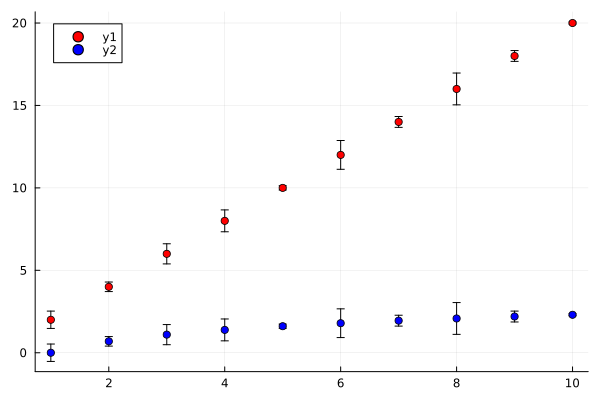

In [32]:
# Mozna odwolywac sie bezposrednio do kolumn w poniższy sposób (gdyz sa typu jednowymiarowych tablic
# Array{T,1})
#Pkg.add("Plots")
using Plots
scatter(df.a, [df.b, df.c], colour = [:red :blue], yerr=df.d)


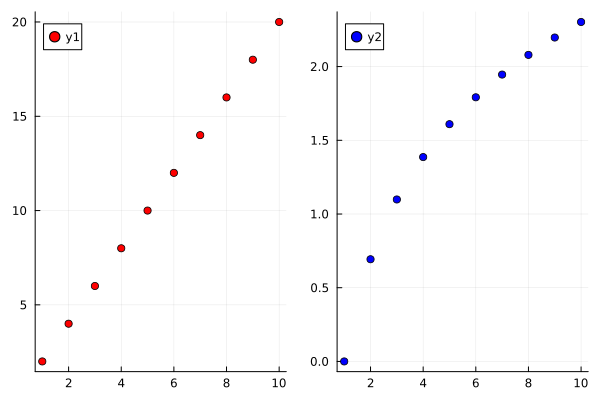

In [33]:
# użycie opcji layout
scatter(df.a, [df.b, df.c],  colour = [:red :blue ], layout=2)

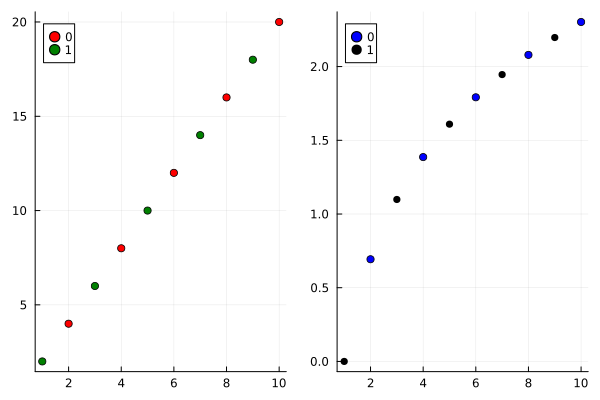

In [34]:
# użycie opcji layout i grup
scatter(df.a, [df.b, df.c], group=df.e,  colour = [:red :blue :green :black], layout=2)

Uwaga: Ze względu na specyfikę języka Julia pomiar czasu wykonania należy brać pod uwagę dopiero od drugiego wywołania danej funkcji
(za pierwszym razem mierzymy również czas kompilacji)

Makro @time - zwraca wartość funkcji i wypisuje czas jej trwania.
Makro @elapsed zwraca czas trwania (może być wygodniejsze w użyciu). 
Warto też oglądnąć działanie makr @timev, @timed, i @allocated

https://docs.julialang.org/en/v1/base/base/#Base.@time

Rand(10) - wylosuj 10-elementową tablicę Float64 z przedziału [0,1)

https://docs.julialang.org/en/v1/stdlib/Random/#Base.rand

### Zadanie 
- Założenie: macierz A - kwadratowa rozmiar vector_size x n; wektory x, y rozmiar n
- Napisać programy w języku Julia do obliczania: <b>uogólnionego</b> iloczynu skalarnego dot(x, <b>A</b>, y) wektorów z użyciem <a href="https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.dot-Tuple{Any,%20Any,%20Any}">LinearAlgebra.dot</a> oraz mnożenia macierzy kwadratowej przez wektor (czyli obliczania A*x) z użyciem 
<a href="https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#Elementary-operations-1">operatora *</a>.
- Uruchomić i zmierzyć czasy działania obydwu funkcji - każdej dla różnych rozmiarów wektorów n. Uwaga: rozmiary dobrać tak, żeby nie zużyć zbyt wiele pamięci, a jednocześnie uzyskać niezerowe wyniki czasowe (wielkości będą zależeć od mocy sprzętu - można próbować testować w okolicach n=1000). Dokonać 10 pomiarów dla każdego rozmiaru wektora.
- Czasy działania powinny  być zapisywane do <b>jednego</b> pliku CSV. Należy zaplanować odpowiednią strukturę kolumn takiego pliku.
- Wczytać dane z w/w pliku do <b>jednego</b> DataFrame w języku Julia. 
- Korzystająć z mechanizmów DataFrame w języku Julia obliczyć średnią i odchylenie standardowe, w taki sposób, aby narysować wykresy średnich czasów obliczenia operacji w zależności od rozmiaru wektora. Dodać słupki błędów do obydwu wykresów uzyskanych z obliczenia odchylenia standardowego. 
- Proszę poukładac wykresy  w tabelkę za pomocą  opcji layouts: https://docs.juliaplots.org/latest/layouts/#Simple-Layouts-1.
- Należy zadbać o staranne podpisanie osi i wykresów.

### Zaimportowanie niezbędnych bibliotek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import timeit
import csv

### Implementacja funkcji ```dot(x, A, y)```

In [2]:
def dot(x: np.ndarray, A: np.ndarray, y: np.ndarray):
    return x.dot(A).dot(y)

### Porównanie czasowe wykonania funkcji ```dot(x, A, y)``` oraz funkcji bibliotecznej ```np.linalg.multi_dot(x, A, y)```

In [3]:
def measure_execution_time(function, *data):
    return timeit.timeit(lambda: function(*data), number=1)

##### Pomiar czasów wykonywania 

In [4]:
repeat = 10

vector_sizes_list = []
dot_times_list = []
library_times_list = []

for test_no in range(1, 11):
    vector_size = test_no * 10 ** 3

    vector_sizes_list.append(vector_size)

    x = np.random.rand(vector_size)
    A = np.random.rand(vector_size, vector_size)
    y = np.random.rand(vector_size)

    dot_times_measurements_list = []
    library_times_measurements_list = []

    for mesurement_no in range(1, repeat + 1):
        dot_time = measure_execution_time(dot, x, A, y)
        library_time = measure_execution_time(np.linalg.multi_dot, [x, A, y])

        dot_times_measurements_list.append(dot_time)
        library_times_measurements_list.append(library_time)

    dot_times_list.append(dot_times_measurements_list)
    library_times_list.append(library_times_measurements_list)

##### Zapis do pliku .csv

In [5]:
headers = ["n"] + [f"dot function {i+1}" for i in range(repeat)] + [f"library function {i+1}" for i in range(repeat)]
path_to_csv = "data/func_exec_time_cmp.csv"
vector_size_data = np.array(vector_sizes_list)
dot_data = np.array(dot_times_list)
library_data = np.array(library_times_list)
data = np.concatenate((vector_size_data[:, np.newaxis], dot_data, library_data), axis=1)

with open(path_to_csv, mode="w") as file:
    csv_writer = csv.writer(file)
    csv_writer.writerow(headers)
    csv_writer.writerows(data)

##### Wczytanie z pliku .csv do DataFrame

In [6]:
df = pd.read_csv(path_to_csv)
df

,n,dot function 1,dot function 2,dot function 3,dot function 4,dot function 5,dot function 6,dot function 7,dot function 8,dot function 9,...,library function 1,library function 2,library function 3,library function 4,library function 5,library function 6,library function 7,library function 8,library function 9,library function 10
0,1000.0,0.002927,0.003853,0.004055,0.004846,0.020592,0.018743,0.004458,0.000403,0.000509,...,0.007094,0.007217,0.005550,0.014067,0.008824,0.007860,0.000702,0.000529,0.000260,0.002789
1,2000.0,0.010299,0.010818,0.003148,0.003864,0.015119,0.006888,0.006172,0.003642,0.010622,...,0.001138,0.013802,0.010413,0.002374,0.004541,0.003657,0.003779,0.010298,0.003607,0.008886
2,3000.0,0.011001,0.003227,0.003963,0.006207,0.006616,0.004315,0.004595,0.007100,0.002762,...,0.007181,0.004791,0.006280,0.004652,0.004388,0.006805,0.002717,0.004855,0.005033,0.005189
3,4000.0,0.007515,0.006375,0.006283,0.010185,0.007603,0.006895,0.006584,0.006602,0.007944,...,0.008111,0.007515,0.007215,0.009136,0.008257,0.012397,0.007799,0.008023,0.006530,0.005197
4,5000.0,0.011069,0.018378,0.039310,0.017558,0.024874,0.038282,0.051939,0.023905,0.028743,...,0.012026,0.019546,0.017412,0.016109,0.026128,0.034581,0.034914,0.031671,0.033234,0.040926
5,6000.0,0.034778,0.023068,0.024043,0.037906,0.022874,0.036017,0.042600,0.024656,0.041540,...,0.051494,0.032596,0.026538,0.044482,0.056148,0.045285,0.034812,0.045797,0.029479,0.031758
6,7000.0,0.029664,0.023319,0.023243,0.027446,0.022335,0.028521,0.027871,0.053224,0.064807,...,0.025456,0.028519,0.028736,0.021335,0.024103,0.023700,0.040602,0.032660,0.065093,0.084646
7,8000.0,0.060934,0.042643,0.033841,0.043546,0.037640,0.047340,0.060171,0.036063,0.032190,...,0.053452,0.032649,0.030073,0.032157,0.032295,0.078134,0.045259,0.036802,0.030786,0.032551
8,9000.0,0.084952,0.076211,0.080163,0.042189,0.043104,0.040208,0.042863,0.078125,0.057015,...,0.054591,0.054229,0.068148,0.038723,0.035886,0.043543,0.082651,0.069342,0.045038,0.040584
9,10000.0,0.056717,0.050257,0.049856,0.050429,0.056363,0.048792,0.050030,0.051149,0.047115,...,0.047912,0.048349,0.053914,0.047962,0.048266,0.047788,0.050117,0.046126,0.054603,0.059184


In [7]:
df["dot function mean"]=(
    df.iloc[:, 1:repeat+1]
        .mean(axis=1)
)

df["dot function std"]=(
    df.iloc[:, 1:repeat+1]
        .std(axis=1)
)

df["library function mean"] = (
    df.iloc[:, repeat+1:2*repeat+1]
        .mean(axis=1)
)

df["library function std"] = (
    df.iloc[:, repeat+1:2*repeat+1]
        .std(axis=1)
)

df


,n,dot function 1,dot function 2,dot function 3,dot function 4,dot function 5,dot function 6,dot function 7,dot function 8,dot function 9,...,library function 5,library function 6,library function 7,library function 8,library function 9,library function 10,dot function mean,dot function std,library function mean,library function std
0,1000.0,0.002927,0.003853,0.004055,0.004846,0.020592,0.018743,0.004458,0.000403,0.000509,...,0.008824,0.007860,0.000702,0.000529,0.000260,0.002789,0.006366,0.007183,0.005489,0.004448
1,2000.0,0.010299,0.010818,0.003148,0.003864,0.015119,0.006888,0.006172,0.003642,0.010622,...,0.004541,0.003657,0.003779,0.010298,0.003607,0.008886,0.007436,0.004076,0.006249,0.004237
2,3000.0,0.011001,0.003227,0.003963,0.006207,0.006616,0.004315,0.004595,0.007100,0.002762,...,0.004388,0.006805,0.002717,0.004855,0.005033,0.005189,0.005629,0.002419,0.005189,0.001296
3,4000.0,0.007515,0.006375,0.006283,0.010185,0.007603,0.006895,0.006584,0.006602,0.007944,...,0.008257,0.012397,0.007799,0.008023,0.006530,0.005197,0.007471,0.001232,0.008018,0.001874
4,5000.0,0.011069,0.018378,0.039310,0.017558,0.024874,0.038282,0.051939,0.023905,0.028743,...,0.026128,0.034581,0.034914,0.031671,0.033234,0.040926,0.028920,0.012314,0.026655,0.009802
5,6000.0,0.034778,0.023068,0.024043,0.037906,0.022874,0.036017,0.042600,0.024656,0.041540,...,0.056148,0.045285,0.034812,0.045797,0.029479,0.031758,0.034158,0.010458,0.039839,0.010087
6,7000.0,0.029664,0.023319,0.023243,0.027446,0.022335,0.028521,0.027871,0.053224,0.064807,...,0.024103,0.023700,0.040602,0.032660,0.065093,0.084646,0.034360,0.014517,0.037485,0.020952
7,8000.0,0.060934,0.042643,0.033841,0.043546,0.037640,0.047340,0.060171,0.036063,0.032190,...,0.032295,0.078134,0.045259,0.036802,0.030786,0.032551,0.042519,0.010849,0.040416,0.015221
8,9000.0,0.084952,0.076211,0.080163,0.042189,0.043104,0.040208,0.042863,0.078125,0.057015,...,0.035886,0.043543,0.082651,0.069342,0.045038,0.040584,0.059555,0.018262,0.053273,0.015573
9,10000.0,0.056717,0.050257,0.049856,0.050429,0.056363,0.048792,0.050030,0.051149,0.047115,...,0.048266,0.047788,0.050117,0.046126,0.054603,0.059184,0.051895,0.003786,0.050422,0.004126


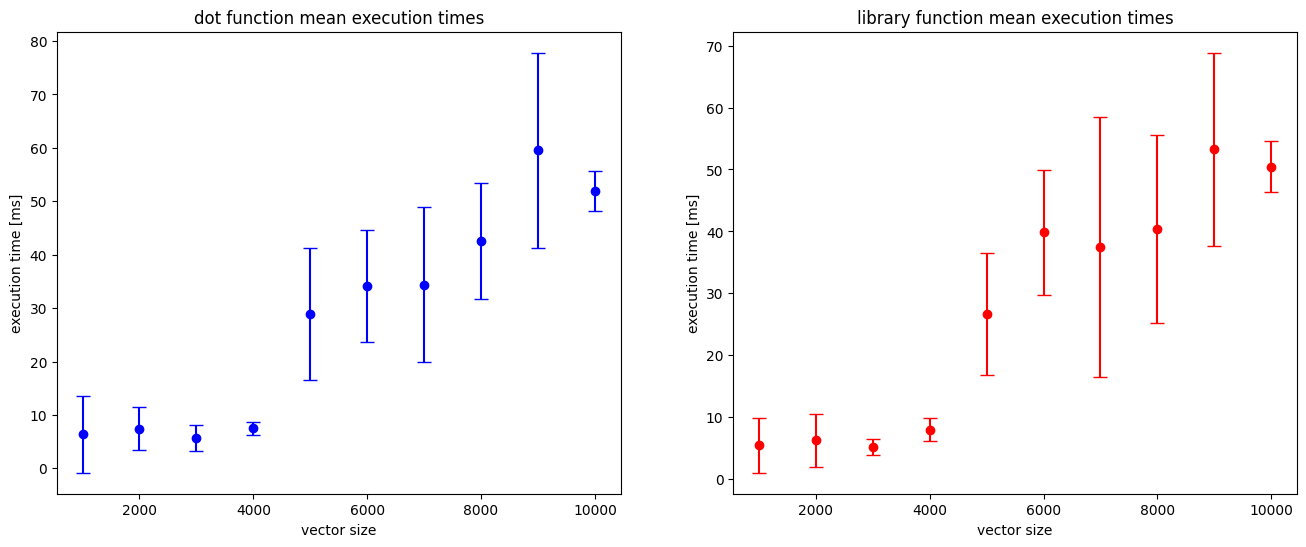

In [8]:
MS = 1000

figure, axis = plt.subplots(1, 2, figsize=(16,6))

dot_function_axis: plt.Axes = axis[0]
library_function_axis: plt.Axes = axis[1]

x_data = df["n"]

# dot function plot

color = "blue"

dot_funciton_y_data = df["dot function mean"] * MS
dot_function_yerr = df["dot function std"] * MS

dot_function_axis.set_title("dot function mean execution times")
dot_function_axis.errorbar(x = x_data, y = dot_funciton_y_data, yerr=dot_function_yerr, fmt = "o",
                            mfc=color,  mec = color, ecolor=color, capsize=5)
dot_function_axis.set_xlabel("vector size")
dot_function_axis.set_ylabel("execution time [ms]")

# library function plot

color = "red"

library_funciton_y_data = df["library function mean"] * MS
library_function_yerr = df["library function std"] * MS

library_function_axis.set_title("library function mean execution times")
library_function_axis.errorbar(x = x_data, y = library_funciton_y_data, yerr=library_function_yerr,
                               fmt = "o", mfc=color, mec = color, ecolor=color, capsize=5)
library_function_axis.set_xlabel("vector size")
library_function_axis.set_ylabel("execution time [ms]")

plt.show()